<center>
    <img src="https://www.clearlyrated.com/brand-logo/talent-path" width="300" alt="cognitiveclass.ai logo"  />
</center>

Instructor and author: [_Dr. Junaid Qazi_](https://www.linkedin.com/in/jqazi/)

# Linear Regression with Python using Scikit-Learn

Hi guys,<br>

Very warm welcome to the Linear Regression with python using scikit-learn lecture. In the theory lecture, we have learned the key concepts and working principle behind Linear Regression (Supervised Machine Learning) model. Its time for hands-on.<br>

&#9989; ***I am very excited because you have put tremendous amount of efforts to come to this stage, where we are doing our first Machine Learning project. We will go through the process step-by-step. It is important, so that we understand the next lectures without going through these steps in details. However, we will revise these steps, several times, along our way in the machine learning section.*** 

Let's start with a very famous and real dataset. Our task is to built a machine learning model to predict the housing price in Boston (USA) area. This housing dataset is a part of scikit-learn and also available on kaggle for you to download. A `.csv` file is also included in the course material. 
[Boston Housing Dataset on kaggle](https://www.kaggle.com/heptapod/uci-ml-datasets/data). Let's use the one which is already included in scikit-learn dataset repository. In this way, you will get to know the process to load built-in datasets from scikit-learn as well.  

**Let's start by creating a real life situation!**
You are hired by a real estate company to help them in their business goals. The company wants you to predict housing prices in Boston (USA) area. Based on the community and safety issues, some areas are in high demand. The company is interested in some kind of automated way of suggesting price of a house based on its features.<br>

Now, you are given a dataset that contain features such as age of the house, number of rooms, crime rate by town, proportion of residential land, nitric oxide concentration, property tax so on.... <br>

Well, you are happy to help because you got a job to do! Now, when you look at the dataset, you think that linear regression is a good model to work with in this type of problem. <br>

You have the data, lets start working on the model!<br>

Details of the full list of features is given below:

* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per USD 10,000
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population
* MEDV: Median value of owner-occupied homes in $1000's

**Note:** We are going to work with more than one variables or features, this is a ***multiple linear regression*** problem. You can try to create a model with one feature, that would be your ***simple linear regression problem***. 

### Let's import the libraries we need

We are already familiar with these ones!

In [1]:
# We are already familiar with these ones!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-675fd65c36b3>:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [2]:
import sklearn
sklearn.__version__

'0.24.1'

In [3]:
# Related to scikit learn, Python machine learning module 
# to work with the built-in datasets
from sklearn import datasets 

**Let's load the built-in housing price dataset, "boston" into "bh"**

In [4]:
bh = datasets.load_boston()

**boston dataset is essentially a dictionary, let's check its keys**

In [5]:
bh.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

**So, it contain data, target which is the price, feature_names are the columns and DESCR is the description on the data**

In [6]:
#print(bh.DESCR)
print(bh['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
bh.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

**Let's create a pandas dataframe with features as column's name and also add target as another column, price.** 

In [8]:
df=pd.DataFrame(data=bh.data,columns=bh.feature_names)
df['price']=bh.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Let's get some information on the data, using `info()`

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


So, there is not missing data, price is the target column along with related features. 

Let's have a quick view on some of the statistical information of our dataset 

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


If you look at the output from `describe()`, we have max, min, mean and standard deviation which suggest the distribution in the features. A very useful information!

## Let's do some Exploratory Data Analysis (EDA)
**It is very important to know the data, let's see how the data look like.**<br>
Let's see how the price is distributed!

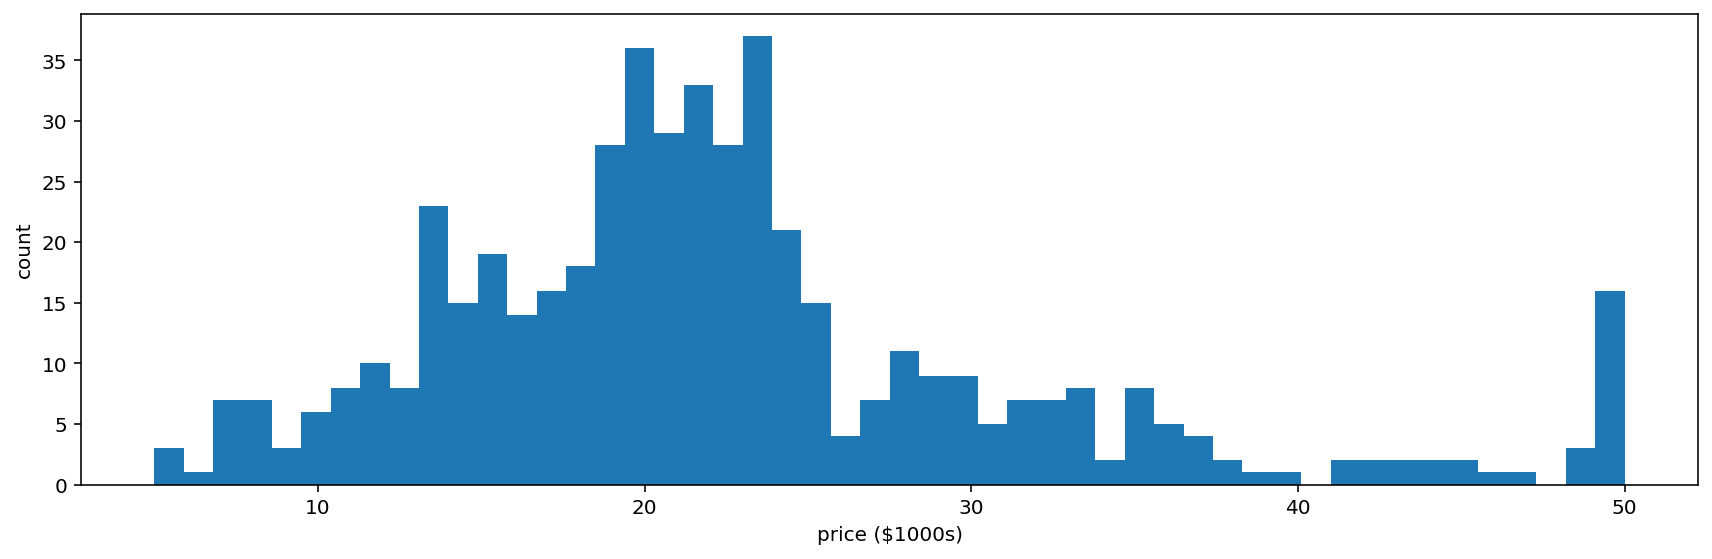

In [11]:
# Housing price (target) histogram 
plt.figure(figsize=(12, 4)) # setting fig size, you can leave this line for default
plt.hist(df['price'], bins=50) # you can change the bin number
plt.xlabel('price ($1000s)') # setting x label
plt.ylabel('count') # setting y label
plt.tight_layout()

So, if we look at the histogram, most of the prices are in 20's (x1000s). We notice that, the average price is around ~ 22K. There are some houses in 50's (x1000s) as well. <br>If you want, you can drop these rows where the price is in 50's, at the moment, we are keeping all the data <br><br><br>
**Moving forward, saborn's `pairplot` function is a good option to explore little more.** <br>
&#9758; Although, we can plot all the feature from our dataset, but the `pairplot` would be very crowded. Let's plot some important features (that we think) to see how they are related to each other!<br>

We can check how the `Crime rate (CRIM)`, `No. of rooms (RM)`,`Age of the house (AGE)` , `% lower status of the population (LSTAT)`, ` weighted distances to five Boston employment centres (DIS)` and `price` are related to each other!

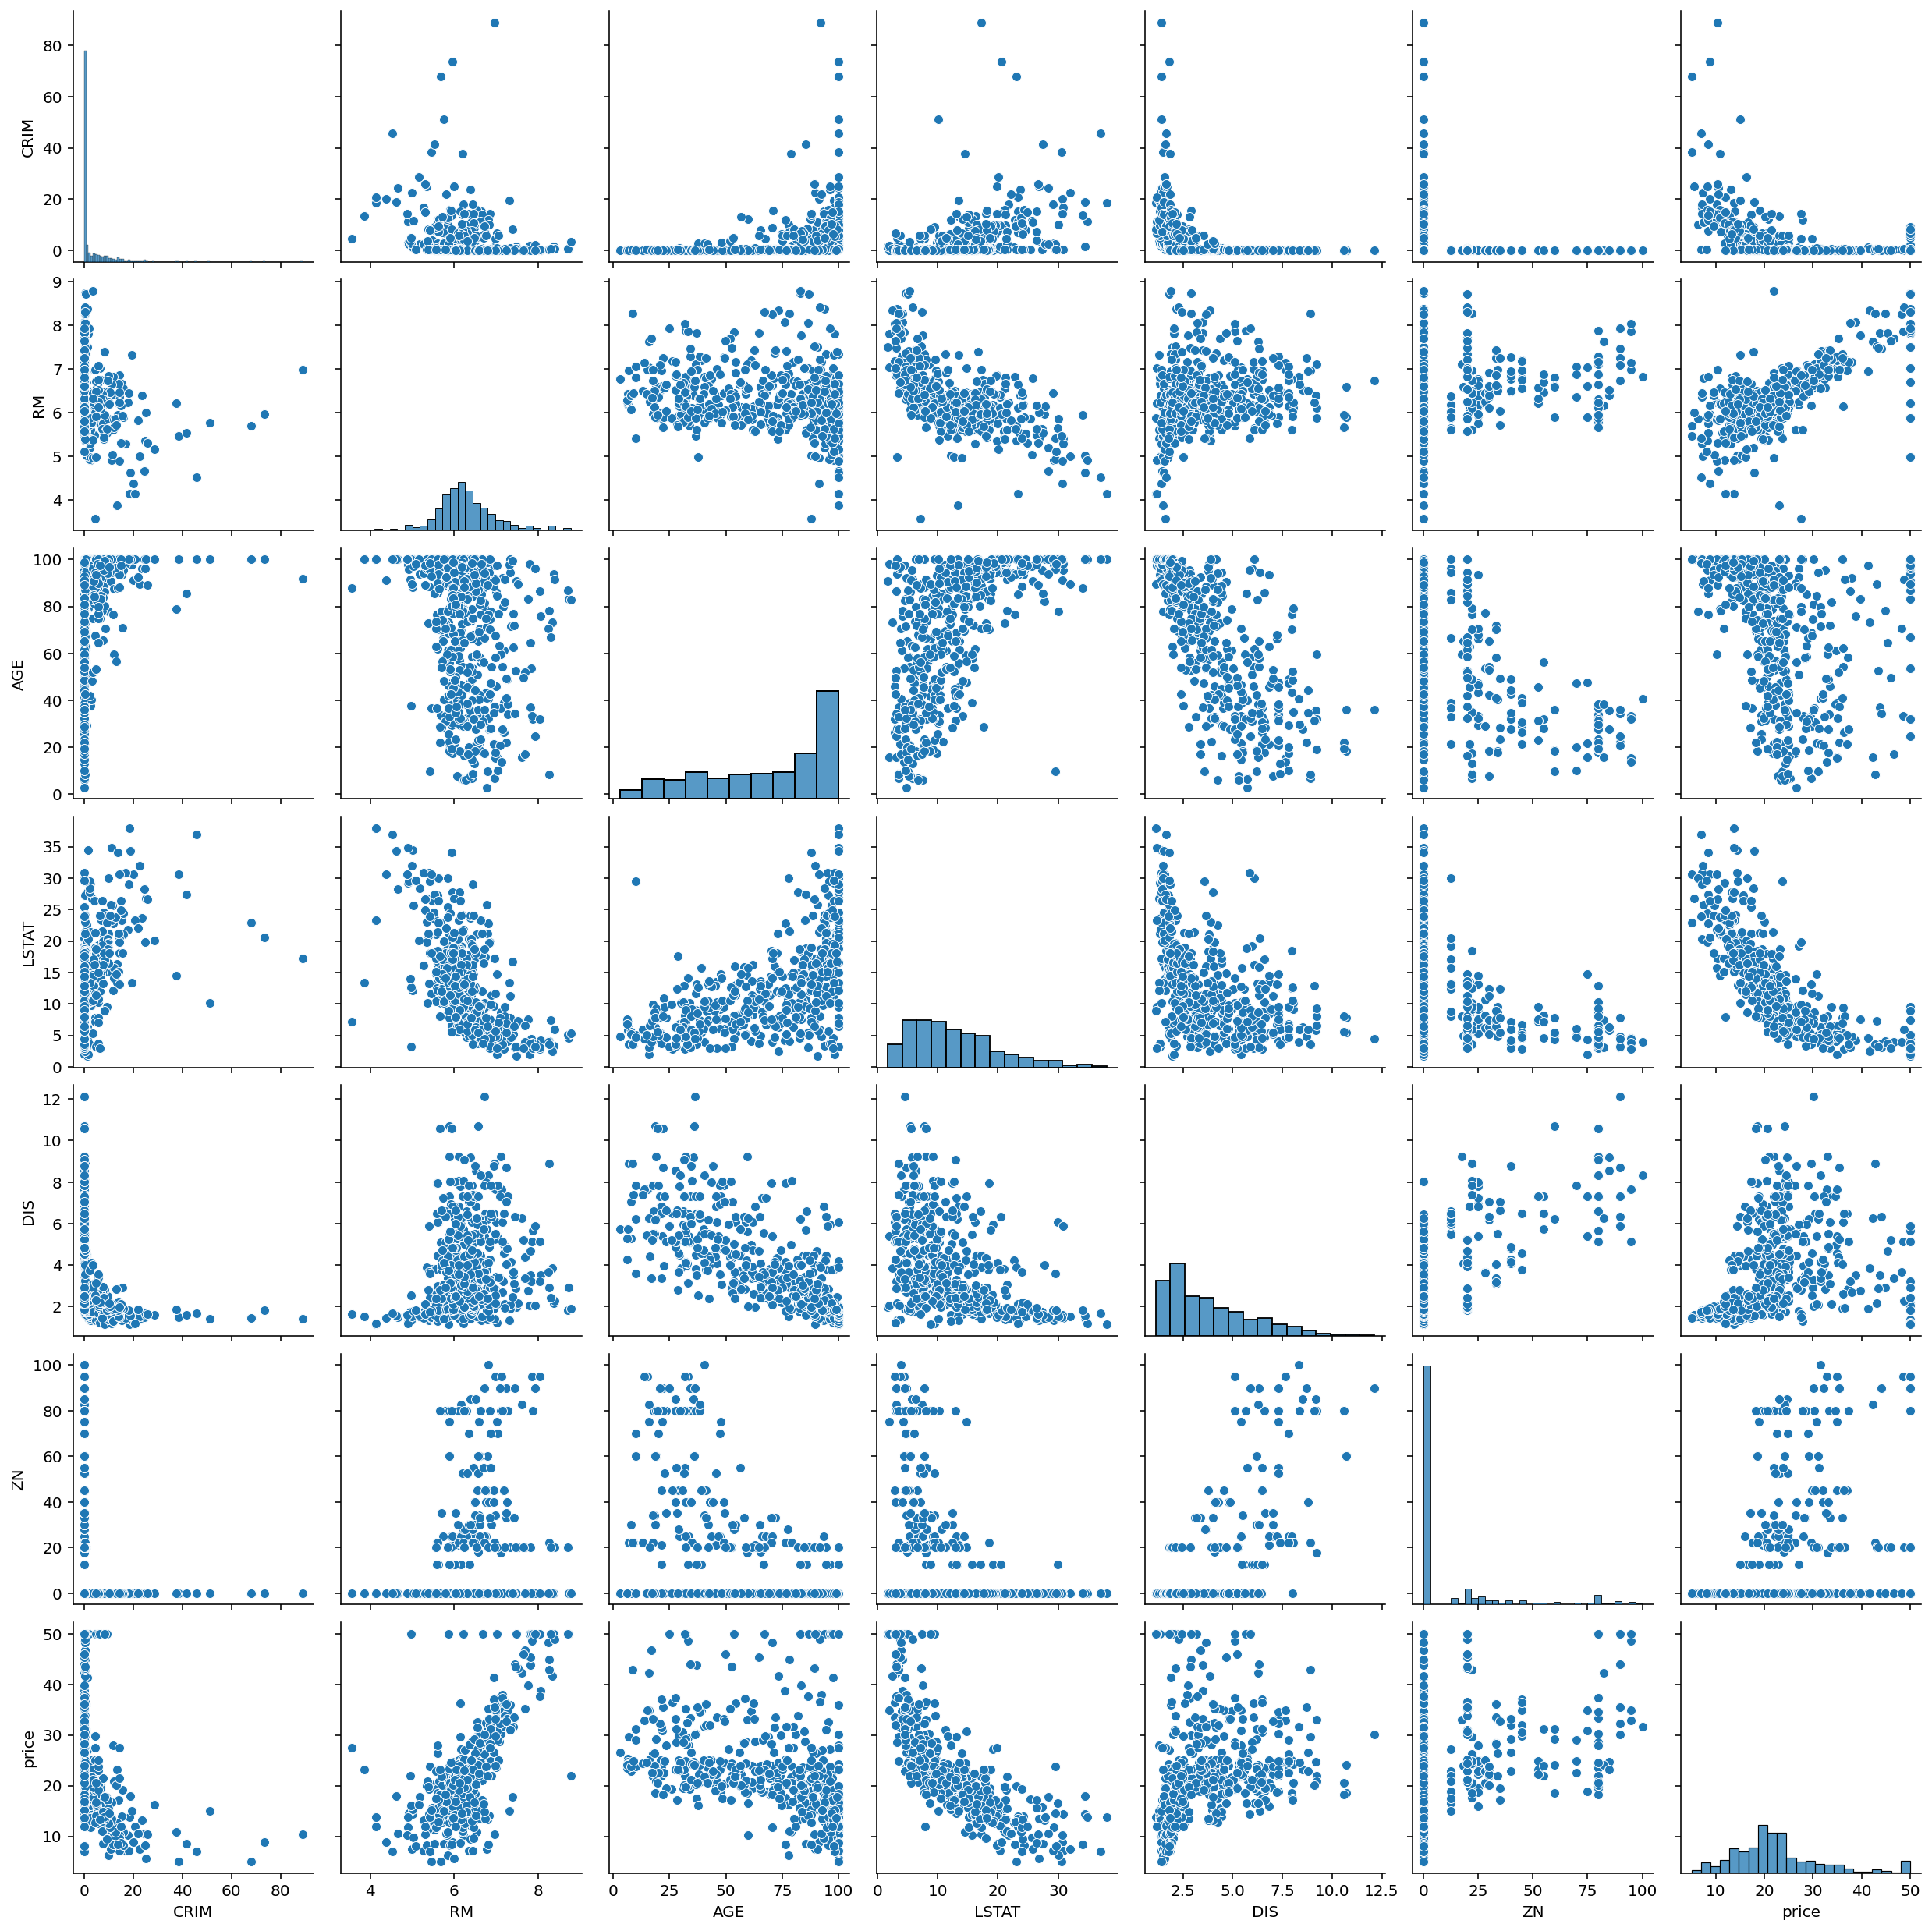

In [12]:
# Crime, No of rooms, Age of the house, Price
sns.pairplot(df[['CRIM','RM','AGE','LSTAT','DIS','ZN','price']]) 
#sns.pairplot(df) # in case you want to plot whole dataset!

If we give a quick look on the last row, price vs selected features, we see some trends. For example, price increases with no. of rooms (price vs RM plot). <br>Let's see how the heatmap looks like for the selected features!<br>
### Let's see how the correlation between selected features looks like using heatmap!<br>

In [13]:
# If you want to create a correlation heatmap for your complete dataframe.
# sns.heatmap(df.corr())

<AxesSubplot:>

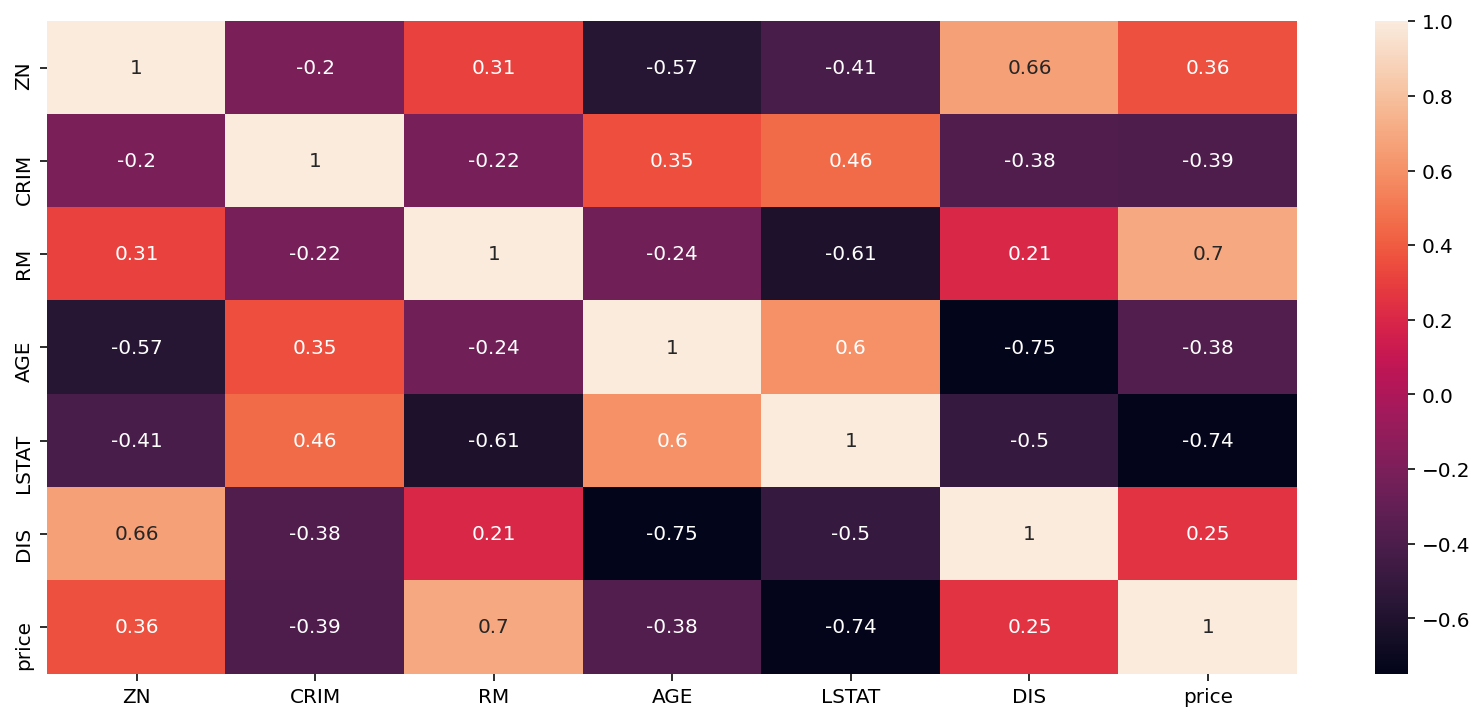

In [14]:
# Heatmap to see visualize the correlations bmw selected feature and price of the home.
plt.figure(figsize=(14, 6))
sns.heatmap(df[['ZN','CRIM','RM','AGE','LSTAT','DIS','price']].corr()
            , annot=True) # reminder: annot = True will put the values on the map!

So, every column is perfectly correlated to itself along the diagonal (this is obvious)!
we can see positive and negative correlation between `price` and other features, but number of rooms (RM) have the highest value for price, that make sense, more the rooms are, higher the price is where as older the house is, lower the price you can expect!<br><br><br>
***Based on your skills set from the first half of this course, you can spend more time on EDA, get more plots and see how much information you can collect from your dataset. In the second half of this course, our focus `Machine Learning` and we will not spend more time on EDA.<br>***

**Let's create a Machine Learning model using `scikit-learn` to suggest the house price based on the selected features.** 

The first thing is to separate out data into: ***Notice uppercase X and lowercase y, it is a convention.***<br>
* X - that will contain the selected features
* y - will be the target values, in this case price of the house.

### X and y arrays
We are only using selected feature, so we need to pass the column names. *(recall from panda's section!)*<br>
&#9758; *I suggest, repeat the same model using all features once we are done with this lecture, that would be a good practice and you can also compare the results!*

In [15]:
X = df[['ZN','CRIM','RM','AGE','LSTAT','DIS']]
y = df['price']

In [16]:
X.head(2)

,ZN,CRIM,RM,AGE,LSTAT,DIS
0,18.0,0.00632,6.575,65.2,4.98,4.0900
1,0.0,0.02731,6.421,78.9,9.14,4.9671


In [17]:
print("Before scaling:")
print("ZN mean:",round(X.ZN.mean(),3), "NZ var:",round(np.var(X.ZN),3))
print("LSTAT mean:",round(X.LSTAT.mean(),3),"LSTAT var:", round(np.var(X.LSTAT),3))

Before scaling:
ZN mean: 11.364 NZ var: 542.862
LSTAT mean: 12.653 LSTAT var: 50.894


### Feature scaling

In [18]:
from sklearn.preprocessing import StandardScaler #,MinMaxScaler
import pickle # need this import
cols=X.columns
scaler = StandardScaler() # Creating instance 'scaler'
scaler.fit(X) # fitting the features
pickle.dump(obj=scaler, file=open(file='transformation.pkl', mode='wb')) # Saving the transformation
scaler = pickle.load(file=open(file='transformation.pkl', mode='rb')) # Loading saved transformation
X = scaler.transform(X) # transforming features 

In [19]:
# check the difference!
X=pd.DataFrame(X,columns=cols) #just creating a dataframe for scaled features
X.head(2)

,ZN,CRIM,RM,AGE,LSTAT,DIS
0,0.284830,-0.419782,0.413672,-0.120013,-1.075562,0.140214
1,-0.487722,-0.417339,0.194274,0.367166,-0.492439,0.557160


In [20]:
print("After scaling:")
print("ZN mean:",round(X.ZN.mean(),3), "NZ var:",round(np.var(X.ZN),3))
print("LSTAT mean:",round(X.LSTAT.mean(),3),"LSTAT var:", round(np.var(X.LSTAT),3))

After scaling:
ZN mean: 0.0 NZ var: 1.0
LSTAT mean: -0.0 LSTAT var: 1.0


# Linear Regression Model Training
Excited!<br>
Time to train our very first Machine Learning model!<br>

### Train Test Split 
Now, we have features in ***X*** and target (price) in **y**. <br>
Next step is to split the data into a training set (`X_train` & `y_train`) and a testing set (`X_test` & `y_test`). <br>
We will train our model on training part of the dataset in `X_train` & `y_train` and then use `X_test` from the test part of our dataset to do the predictions. We will then evaluate the performance of model using `y_test` and predictions from our trained model. Confusing, don't worry, you will get a clear picture in a while.<br>
Luckily, `Scikit-learn` already has a method `train_test_split` to split the dataset for us. Let's import this built-in method and do the split.<br>
We will pass our complete dataset to `train_test_split` method and tell the `test_size`, which is the % of the dataset that we want in the `test data`. <br>
&#9758; want to save some typing, after import, <Shift+Tab> and copy paste train_test_split from the end of docstring!<br>
we will leave leave the standard `test_size = 0.33` and `random_state = 42` at the moment. 
* *`random_state:` For the same dataset, the `random_state = some_number` will make sure that you are getting same split if you pass the same number. if you pass the same number as mine, you will get the same results for the same data. If you pass a different `random_state`, you may not get the same results but it does not mean your results are not correct! <b>[This StackOverFlow link](https://stackoverflow.com/questions/28064634/random-state-pseudo-random-numberin-scikit-learn) may help to understand more on the `randon_state`</b>* 

In [21]:
# importing train_test_split
from sklearn.model_selection import train_test_split

# passing X and y along with other parameters to get X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Creating and Training the Model
**OK!<br>
Now we have `train (X_train, y_train)` and `test (X_test, y_test)` parts of our dataset, time to create a model for the real estate company!**<br>

First thing first, we need linear regression module to train on our dataset! right?.<br> 

It's easy, let's import `linear_model` family from the `sklearn` so that we can use its member `LinearRegression` for our data. <br> <br>

In [22]:
#LinearRegression model is a part of linear_model
from sklearn import linear_model

**Let's create an instance for the LinerRegression model**

In [23]:
lm = linear_model.LinearRegression()

<font style="font-size:14px;color:green;">*We can use `from sklearn.linear_model import LinearRegression` as well and than use `lm = LinearRegression()`*</font>

We have create an instance `lm` (`LinearRegression` object) to use. <br>
If you write `lm.` *(notice "." after `lm`)* and press tab in the code cell, you will find available options. At the moment, we want to use `fit()` that we need to train our machine learning model.

**Training the model on our train dataset**

In [24]:
lm.fit(X_train,y_train)

LinearRegression()

&#9758; We got the output above, our `LinearRegression` model has been trained on the provided (training part) dataset.<br>

## Model Evaluation
After training the model, we need to evaluate its performance. <br>Let's start with checking it's intercept and coefficients for each feature and see how we can interpret them.<br>
<b>*Recalls*</b> *your school maths and the simplest form of equation, slop intercept form "`y = mx + c`". The intercept (often labeled the constant "c") is the expected mean value of Y when all X=0. right?*

In [25]:
# print the intercept
print(lm.intercept_)

22.315162052714275


We can grab the coefficients related to each feature in the dataset used. Each feature will have a separate coefficient!<br>

In [26]:
# Let's grab the coefficients from our model 
lm.coef_

array([ 1.46002194, -1.0856559 ,  2.70555527, -0.21732353, -4.99113817,
       -2.25598966])

**Optional**<br>
Well, it might be a good idea to create a nice looking dataframe along with feature names and their coefficients, its easy. We can grab the column names using `X_train.colums` or `X.columns` and use `lm.coef_` to create a dataframe. Organized things always look better!

In [27]:
# Our columns are
X.columns
X_train.columns

Index(['ZN', 'CRIM', 'RM', 'AGE', 'LSTAT', 'DIS'], dtype='object')

In [28]:
coeffs = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeffs

,Coefficient
ZN,1.460022
CRIM,-1.085656
RM,2.705555
AGE,-0.217324
LSTAT,-4.991138
DIS,-2.255990


We can even plot these coefficients, nice to have a histogram plot!

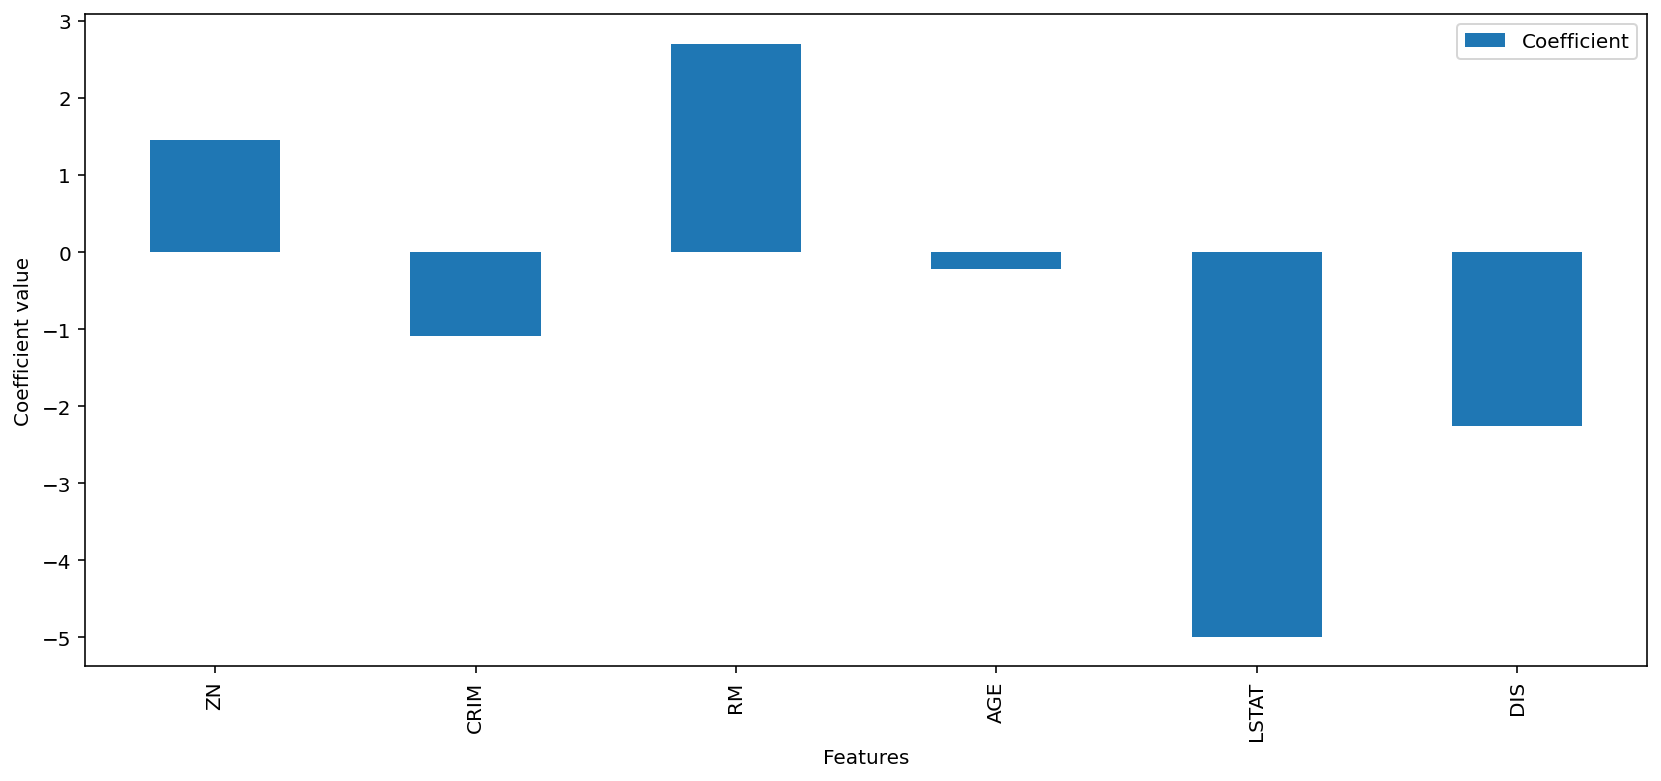

In [29]:
# Using panda's built-in visualization, good to revise!
coeffs.plot(kind='bar', figsize = (14,6))
plt.xlabel('Features'); plt.ylabel('Coefficient value'); # two statements in one line using ";"
# the plot looks even better than the dataframe, our eys like the visual stuff!

**Let's discuss coefficients briefly.**<br>

* **Starting with `RM = 2.7..`:** This suggest, if we keep all other coefficients constant, a one unit increase in the RM is associated with an increase of 3.839684 in the price. <br>
* The same is for other related coefficients. e.g. **`LSTAT = -4.99.. (% lower status of the population) DIS = -2.25.. (weighted distances to five Boston employment centres)`** etc decreases the price according to their coefficients, keeping all other constants.
* Although, **`age`** of the house has negative coefficient value **`(-0.21..)`**, however, it has the minimum effect on the price. 

If you want further detail and mathematics behind this, please read the suggested reading assignments!

## Predictions from our Model
We have trained our model, discussed the coefficients which make some sense, now, its important to know how well the model is doing!<br>

Our model have never seen `X_test`, let's provide test data "`X_test`" to our created model and see what the predictions are. Once we get the predictions from the model, we can compare them with what we have in our `y_test` *(known values, its supervised learning!)*. <br>

In [30]:
# Getting predictions from trained model 
predictions = lm.predict(X_test)
#predictions # in case you want to see the numbers!

We already know the price of all homes with features in `X_test`, which is in `y_test`, let's plot `y_test` and predictions, scatter plot is a good option!

Text(0, 0.5, 'predictions from the model')

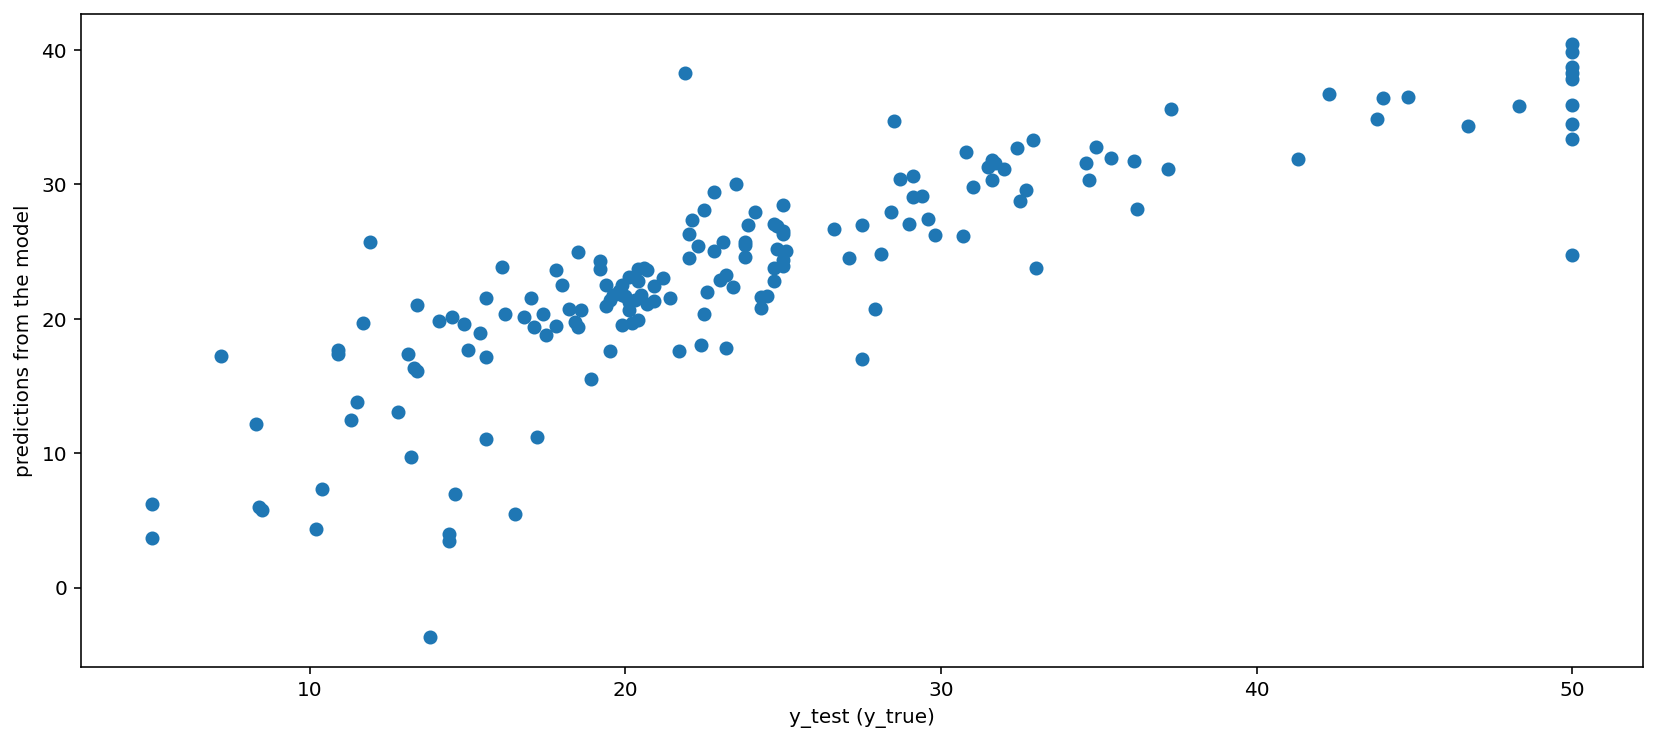

In [31]:
plt.figure(figsize=(14, 6))
plt.scatter(y_test,predictions)
plt.xlabel('y_test (y_true)')
plt.ylabel('predictions from the model')

In [32]:
#plt.figure(figsize=(14, 6))
#plt.scatter(y_test,predictions)
#plt.xlabel('y_test (y_true)')
#plt.ylabel('predictions from the model')

**Residual Histogram** can tell us how much the predicted value differ from the actual value in `y_test`. We can simple do the subtraction `y_test - predictions` for this plot.

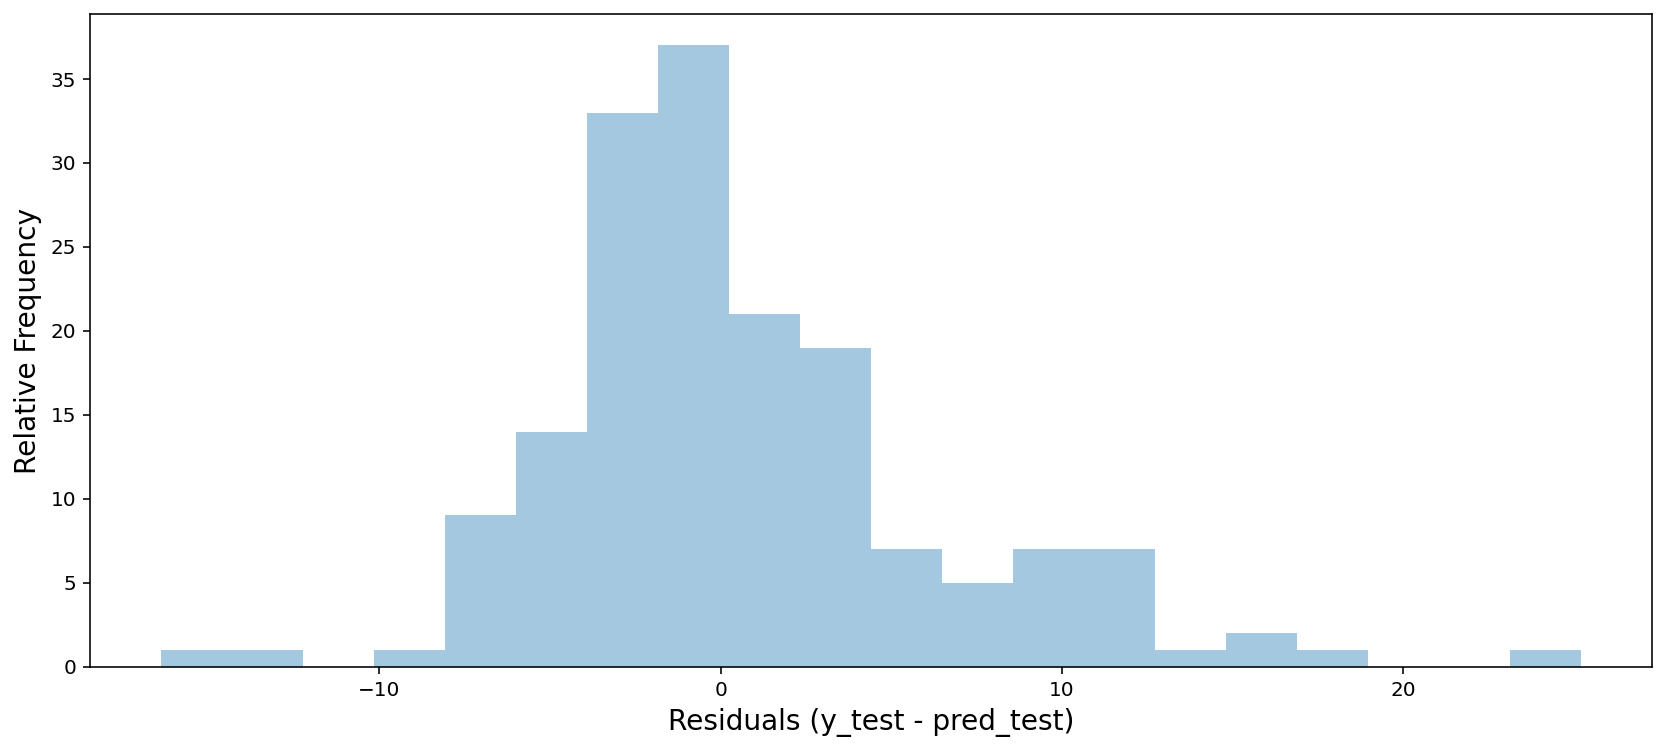

In [33]:
#Residual Histogram
plt.figure(figsize=(14, 6))
sns.distplot(y_test-predictions,kde=False);#,bins=30);
plt.xlabel('Residuals (y_test - pred_test)', fontsize=14)
plt.ylabel('Relative Frequency', fontsize=14);

Well, we have trained our model "`lm`". The residual plot looks fine. Let's see what is the accuracy of our model. We can call `score` function on our trained model for this purpose, or we can use `r2_score` function from `sklearn.metrics`.<br>
Let's try both!

In [34]:
# Calling score on trained model "lm"
print("The accuracy score of our model in train part is: ", lm.score(X = X_train, y = y_train))
print("The accuracy score of our model on test part is: ", lm.score(X = X_test, y = y_test))

# In case, you don't want long number, try round function - code below
# print("The accuracy score of our model is: ",round(lm.score(X = X_test, y = y_test), 3))

The accuracy score of our model in train part is:  0.6634867928198659
The accuracy score of our model on test part is:  0.6709331863082428


In [35]:
# We need to import matrices to access r2_score
from sklearn import metrics

In [36]:
# using r2_score here
print("The accuracy score of our model is: ")
print(metrics.r2_score(y_true = y_test, y_pred = predictions)) 
# y_true, y_pred order is must if you are not passing them by name (y_test, y_pred)

The accuracy score of our model is: 
0.6709331863082428


R-squared ($R^{2}$ or $r^{2}$) -- coefficient of determination -- is a regression score function. It is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. <br>***Best possible score is 1.0*** and it can be negative (because the model can be arbitrarily worse). *Remember: A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^{2}$ score of 0.0.*  

So, the accuracy score, R-squared, looks ok!<br>
Now, at this stage, I want to introduce you to some common evaluation loss functions for regression problem.

## Regression Evaluation Metrics


Let's learn three common evaluation metrics for regression problems. All of these are **loss functions**, and out goal in the modeling is to minimize the loss.<br>

*Consider, ${y}$ is a vector of `n` predictions generated from a sample of `n` data points on all variables, and 
$\hat{y}$ is the vector of observed values (target values) of the variable being predicted.<br>*

**[Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)** (MAE) is the mean of the absolute value of the errors: <br>
it's the average error!

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i  |$$

**[Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)** (MSE) is the mean of the squared errors:<br>
**MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**[Root Mean Squared Error](https://en.wikipedia.org/wiki/Root-mean-square_deviation)** (RMSE) is the square root of the mean of the squared errors:<br>
**RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units. <br><br>The root-mean-squared error (**RMSE**) **or** root-mean-square deviation (**RMSD**), is a frequently used measure of the differences between values predicted by a model or an estimator and the values actually observed. The RMSD represents the sample standard deviation of the differences between predicted values and observed values.

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Let's calculate **MAE**, **MSE** and **RMSE** for trained model. <br>We need to pass true and predicted values of our targets, `y_test` and `predictions` to the respective method! Once again, scikit-learn help us to calculate these loss functions, MAE and MSE can be accessed through `metrics` in sklearn and RMSE can be calculated using MSE.<br>
Let's do this now!

In [37]:
# Mean Absolute Error (MAE)
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) # remember the order (y_true, y_pred)

# Mean Squared Error (MSE)
print('MSE:', metrics.mean_squared_error(y_test, predictions)) # order is must (y_true, y_pred)

# Root Mean Squared Error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) # order is must (y_true, y_pred)

MAE: 4.180750697077355
MSE: 34.08352194479761
RMSE: 5.83810944953909


If we look at the evaluation matrices and accuracy score, model is not the best but still the values look fine. Remember, we did not do much in the data preprocessing, at-least, we can think about removing the outliers and see if we can improve the model **(To Do!)**.<br>

## Finalizing the Model
Consider, we have found an accurate machine learning model. This is amazing but not the end of our project, we need to save our trained model. `Pickle` is the standard way of serializing objects in Python. We can use the pickle operation to serialize our trained model/algorithms and save the serialized format to a file with some name. Later we can load the saved model file to de-serialize and use it to make new predictions. <br>*We usually schedule the re-training of our models when sufficient amount of new data is available.*<br>
Let's do the following steps:
* save the model with some name
* load the saved model
* do the predictions on y_test
* cross check if we get the same results on test data (compare with the once we got above)

In [38]:
# we need to import pickle module
import pickle 

In [39]:
# save the model to disk
filename = 'final_model.sav'

# lm is our model, see above!
# file will be stored on the disk, see the working directory
pickle.dump(lm, open(filename, 'wb')) # wb is stands for writing only in binary format
#pickle.dump(lm, open('final_model.sav', 'wb')) # one line if you are interested!

In [40]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb')) # rb stands for reading only in binary format

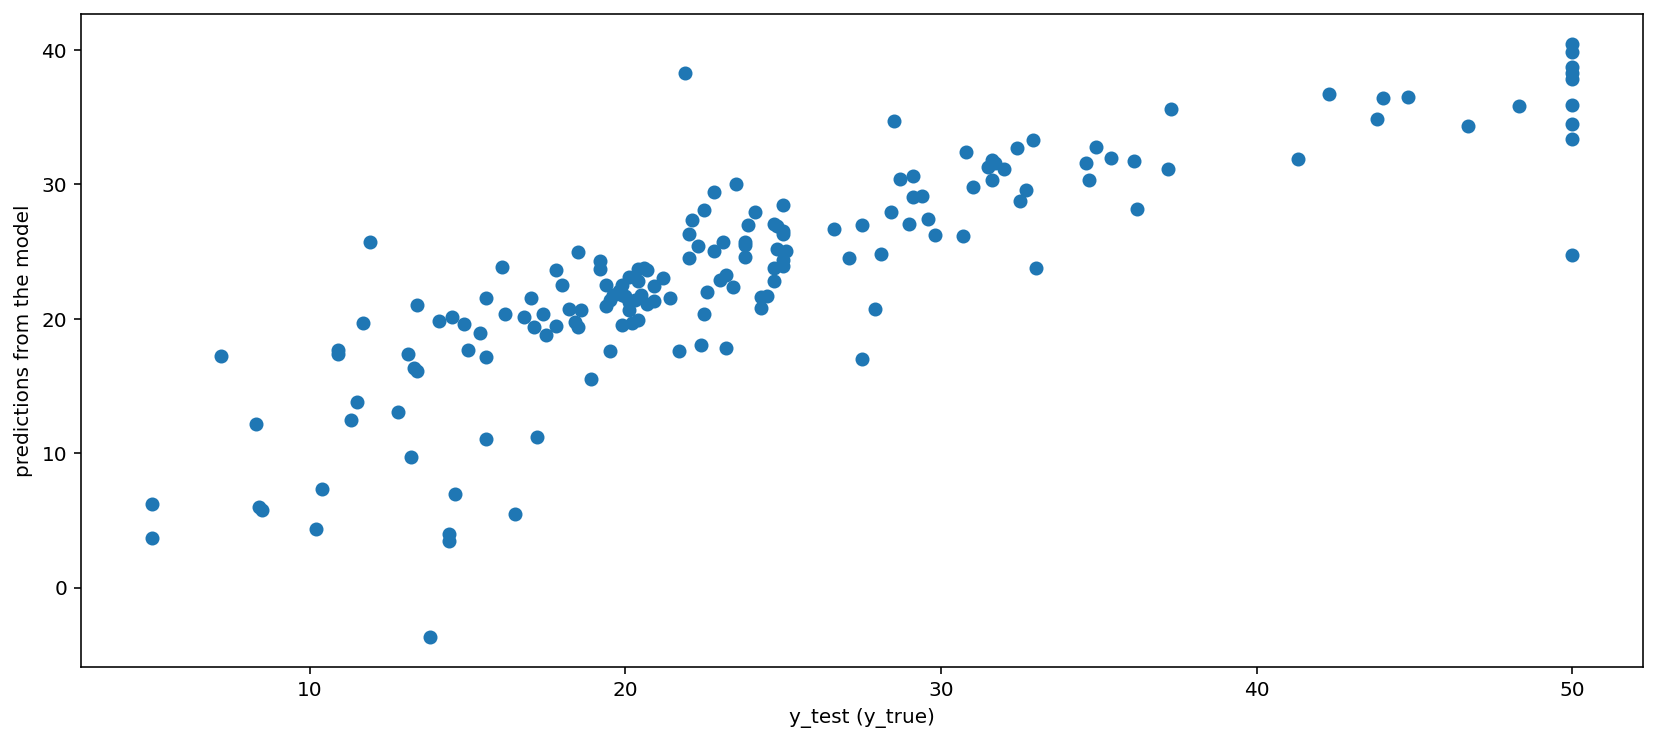

In [41]:
# let's do predictions using stored model after loading
predictions = loaded_model.predict(X_test)
plt.figure(figsize=(14, 6))
#scatter plot
plt.scatter(y_test, predictions) # confirm, if you got the same plot as above!
plt.xlabel('y_test (y_true)')
plt.ylabel('predictions from the model');

In [42]:
print("Accuracy score: ", lm.score(X = X_test, y = y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Accuracy score:  0.6709331863082428
MAE: 4.180750697077355
MSE: 34.08352194479761
RMSE: 5.83810944953909


**Great**, we are done with training, evaluating, saving, loading and predicting new data using our first machine learning model. 

## Cross Validation:
Now, I want to introduce another very important concept of Cross Validation at this stage. You know what, my aim is to introduce the thing at the stage where you need them so that you can remember with some context.<br>
**These are my notes, and I am trying to write in way that we can use them as a reference!<br>**
Recall, we have already learned about **overfitting** and **underfitting** along with **bias variance trade-off** in the theory lecture. We are always looking for a sweet-spot between over and under fitting (recall the plot from theory lecture). <br>
We have used train/test split in the above model, where we simply divided our data into `train (X_train, y_train)` and `test (X_test, y_test)` datasets with some percentage. We trained our regression model on the training part and tested/validate on the test part. Both train/test split and cross validation help to avoid overfitting more than underfitting, however, train/test split does have its dangers:
* What if the split we make is not random? 
* What if one subset (train/test) of our data has only one type of datapoints and is not a true representative of out complete dataset *(in a simplest case, you can consider your data to be ordered by number of rooms and you get only the rooms with more number is test data)*.

This will result in overfitting, and we don't want this. **This is where cross validation plays it's role**. 
<br> Let's move on and learn about the cross validation now. It is a very simple concept and somehow similar to train/test split.<br>

<i>[The figure below is taken from scikit-learn's official documentation - fair use policy](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)</i>

<img style="float: center;height:400px" src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png">

The most commonly used cross validation is **K-Folds Cross Validation**. In this approach, we split our data into **k different subsets** (also called folds). We use `k-1` subsets to train our data and leave the one subset/fold as test or validate data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.<br>
Let's try to understand from the figure above:
* We divided our full data into training data and test data
* Training data is further divided into 5 subsets `(Fold 1, Fold 2, Fol 3, Fold 4, Fold 5)`
* For each iteration `(split 1 to split 5)`, we leave one fold for test or validating and train on the rest
* Once we are done with all the subsets/folds, we test our model on test data

So simple and easy concept! In this way, we can potentially avoid on minimize the danger of overfitting.<br><br>

*In another type of cross validation, **`leave One Out Cross Validation (LOOCV)`**, the number of subsets/folds are equals to the number of observations/datapoints in our dataset. Each observation is used once as a test set while the remaining observations for the training set. This is equivalent to `Fold = number of observations in k-folds`. Due to the high number of test sets (which is the same as the number of samples) LOOCV can be computationally expensive for large datasets. For the bigger datasets, we should prefer to use other methods such as k-folds.*

So, time for the hands-on, let's learn with a practical example now!

Now, we can ask one quick question, How many folds we want? Well, more the folds/subsets we have, we will be reducing the error due the bias but increasing the error due to variance. With bigger number of folds, the computational cost will be higher and the longer it would take to compute. On the other hand, with lower number of folds, it would be computationally cheaper, and we will be reducing error due to variance, but the error due to bias would be bigger. A value between 3 to 5 is advised larger sized datasets. For very small datasets, it is recommended to use LOOCV.

The simplest way to use cross-validation is to call `cross_val_score` helper function on the estimator and the dataset. The function evaluate a score by cross-validation. We need import it first. 

In [43]:
# importing cross_val_score
from sklearn.model_selection import cross_val_score

In [44]:
# Let's create an instance for LinearRegression
lm_cv = linear_model.LinearRegression()

# 5-fold cross validation -- test dataset
scores = cross_val_score(lm_cv, X_train, y_train, cv = 5) # <shift+tab> for doc string

print("CV scores: ", scores) # scores for each cv
print("mean score: ", scores.mean()) # mean score
print("std: ", scores.std()) # standard deviation

CV scores:  [0.50558948 0.65222268 0.71268279 0.70678896 0.55564842]
mean score:  0.6265864652324752
std:  0.08267370774755105


*Note: cross_val_score doesn't changes your estimator, and it will not return fitted estimator. It just returns score of estimator of cross validation.*

We can use `cross_val_predict` to do the predictions, let's do another import.

In [45]:
from sklearn.model_selection import cross_val_predict

In [46]:
lm_cv_p = linear_model.LinearRegression() 
# you can use previous instance "lm_cv" as well, I am just trying to keep things straight forward

In [47]:
cv_pred = cross_val_predict(lm_cv_p, X_train, y_train, cv =5)
#len(cv_pred)

Now, let's check the accuracy for Cross validated predictions. Notice, we are only using test dataset.

In [48]:
print("cv_predicted evalutions")
print("Accuracy score: ", metrics.r2_score(y_train, cv_pred))

cv_predicted evalutions
Accuracy score:  0.6380260867773031


*Warning Note on inappropriate usage of cross_val_predict: <br>
The result of cross_val_predict may be different from those obtained using cross_val_score as the elements are grouped in different ways. The function cross_val_score takes an average over cross-validation folds, whereas cross_val_predict simply returns the labels (or probabilities) from several distinct models undistinguished. Thus, cross_val_predict is not an appropriate measure of generalisation error. [Reference: Scikit-learn official website](https://scikit-learn.org/stable/modules/cross_validation.html)*

So, this was all about Linear Regression at the moment. If you want to know more, please explore scikit-learn's official documentation. 

### To Do:
* What did you learn from cross validation, do you think your model is a good model?
* Repeat the model using all features in the 'Boston housing dataset' and compare the difference with the results in this notebook.
* Repeat this model for another dataset [**kc_house_data.csv**](https://raw.githubusercontent.com/junaidqazi/DataSets_Practice_ScienceAcademy/master/kc_house_data.csv). This is another real dataset on **house sales in King County, USA**.
* (Leave this part at the moment, come back after KNN) Repeat the above project with scaled features (you don't need to do much, just remove the scaling steps and re-run the code) and see the difference, what do you learn from this exercise?

## Good to know -- A common question on error!
**Indeed, we want to minimize the error and the best value is 0.0 (when the line is passing exactly through all the data points -- recall the lecture notes). However, it is not realistic.**

Think about some situation:

You have high variance and your target values are spread over, say b/w 0 and 1000.

Your got situation where you have **some outliers with extreme values** (only very few data points with a value above 1000 and all other are b/w 0 and 100)

**You got a nice dataset (usually you get after data cleaning -- domain knowledge is important) which is a good representative with acceptable bias and variance (recall bias-variance trade-off lecture)**

Let's try to understand this with a very simple example:

You have:

**`target`** = `[ 4, 2, 3, 4, 10, 4, 6 ]` <br> **`predictions`** = `[ 1, 3, 4, 2, 6, 5, 2 ]`

**`MAE`**: 2.2857 <br> **`MSE`**: 6.8571

**Now, let's replace <font style="color:green;">6</font> with <font style="color:red;">1000 -- outlier -- </font>in your targets:**

**`target`**  = [ 4, 2, 3, 4, 10, 4, <font style="color:red;">**1000**</font> ] <br>
**`predictions`** = [ 1, 3, 4, 2, 6, 5, 2 ]

**`MAE`**: 144.285 <br>
**`MSE`**: <font style="color:red;">**142290.857**</font>

(You can calculate MAE and MSE the same way we did in the linear regression section -- above)

You have an <font style="color:red;">outlier "1000"</font>, you need to deal with that so that you can get a generalized model. <br>
Indeed, the **error based metrics like MAE, MSE, RMSE ...., provides an estimate on the prediction quality. However, deciding on a threshold value for these metrics is tricky. For example, you can have higher value due to a small number of outliers (high error predictions)**. 

I hope you got the intuition. Good Luck!

# Extra Reading and resources: 

* [**Data Science from Scratch -- Part 1: Advance Analytics**](https://leanpub.com/data-science-from-scratch)

* [**Data Science from Scratch -- Part 2: Business Machine Learning**](https://leanpub.com/datascience-from-scratch-p2-business-machine-learning/c/r1W4Bml3Zqr6)


## License

Author: [___Dr. Junaid Qazi___](https://www.linkedin.com/in/jqazi/)<br>
Twitter: [***@JunaidSQazi***](https://twitter.com/JunaidSQazi)

Copyright 2021

Licensed under the [Apache License, Version 2.0](http://www.apache.org/licenses/LICENSE-2.0) (the "License").<br>you may not use this file except in compliance with the License.
You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

*Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. Please see the License for the specific language governing permissions and limitations under the License.*


*This is not an official product but sample code provided for an educational purpose.*

***Acknowledgement is requested***